#**TP2**

#**I-Préparation de données** 

## 0- Téléchargement des données 

In [ ]:

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

##1-Informations sur les données 

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

7.a)
MNIST contient 70 000 images en niveau de gris, et chaque image est caractérisée par un features de taille 784 =28*28 


In [ ]:
X = mnist.data
X.shape #nombres de features = instance et taille de chaque features
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


7.b)


In [ ]:

Y = mnist.target #La taille des labels=classes
Y.shape # (le nombre des features)

print(Y)


['5' '0' '4' ... '4' '5' '6']


7.c)

In [ ]:
import numpy as np
classeDif = np.unique(Y) 

7.d)

In [ ]:
descritpion= mnist.DESCR

8.a) Affichez la première instance de la base de données




In [ ]:
#np.reshape(X[0],(28,28));
img0=mnist.data[0].reshape((28,28))#redimensionner la première instance des données

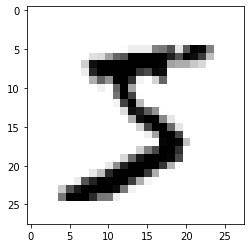

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
plt.imshow(img0,cmap=mpl.cm.binary)



8.b) Affichez la classe de la première instance



In [ ]:
print(classeDif[5])


5


9) Affichez la type du prmeier label 


In [ ]:
print(type(classeDif[5]))

<class 'str'>


10)  Appliquez le casting


In [ ]:
Y = Y.astype(np.uint8) 



##2-Répartition des données 


*   X : Les features = instances 
*   Y : Les labels = classes




In [ ]:
X_train,X_test,Y_train,Y_test= X[:60000],X[60000:],Y[:60000],Y[60000:]

#**II-Apprentissage d'un classifieur binaire**

15) Classification binaire sur les labels = 5 


In [ ]:


Y_Train_label_5  = []
for i in range (len(Y_train)) :
    if Y_train[i] == 5 :
        Y_Train_label_5.append(True)
    else:
        Y_Train_label_5.append(False)
  
Y_Test_label_5  = []
for i in range (len(Y_test)) :
    if Y_test[i] == 5 :
        Y_Test_label_5.append(True)
    else:
        Y_Test_label_5.append(False)


#print("Y_Train_label_5",Y_Train_label_5);
#print("Y_Test_label_5",Y_Test_label_5);


16 ) Apprentissage des données classificateur Stochastic  

(Toujours classification binaire) 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

SGDClassifier = SGDClassifier()


SGDClassifier.fit(X_train,Y_Train_label_5);


17) Prédiction des classes de la première instance de la base de données. 


In [ ]:

predictSGDClassifier = SGDClassifier.predict(mnist.data[0].reshape(1, -1)) #Prédiction des données 
print(predictSGDClassifier)
if predictSGDClassifier == True :
  print("True , value = 5")
else:
  print("False , value != 5")


[False]
False , value != 5


##2- Evaluation du modèle d'apprentissage sur les données   d'apprentissage






###2.1 Taux de classification



19)  répartit la base d'apprentissage en base d'apprentissage et en base de validation en utilisant la méthode 3-fold cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score

#cv = 3 car 3-fold cross-validation.
scores= cross_val_score(SGDClassifier,X_train,Y_Train_label_5,scoring="accuracy",cv=3)


#valeurs des 10  RMSE 
print(" 3 RMSE SGDClassifier",scores,"\n")

#écart type et moyenne 
print("Accuracy SGDClassifier : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))





 3 RMSE SGDClassifier [0.9472 0.9661 0.9654] 

Accuracy SGDClassifier : 0.96 (+/- 0.02)


On a un score assez bon qui se rapproche de 1. Avec une moyenne de score de 96%

3 RMSE SGDClassifier [0.95915 0.95915 0.9692 ] 

20) créer un classifieur simple qui classifie toutes les images de MNIST comme "non-5"


Utiliser un nouveau classif

In [ ]:
from sklearn.base import BaseEstimator, clone
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

class Never5Classifier(BaseEstimator):

  def fit(self,X,Y):
      pass

  def predict(self,X):
      return np.zeros((len(X),1), dtype=bool);
        

non5Clf = Never5Classifier()
non5Clf.fit(X_train,Y_Train_label_5)
probable_non5 = non5Clf.predict(X_train)


In [ ]:
#print(probable_non5)

In [ ]:
from sklearn.model_selection import cross_val_score

non5CLF = Never5Classifier()

scores2 = cross_val_score(non5CLF,X_train, Y_Train_label_5 , scoring='accuracy',cv=3)

#valeurs des 3  RMSE 
print(" 3 RMSE non5CLF",scores2,"\n")

#écart type et moyenne 
print("Accuracy non5CLF : %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))



 3 RMSE non5CLF [0.91125 0.90855 0.90915] 

Accuracy non5CLF : 0.91 (+/- 0.00)


 La moyenne des taux de classification est autour de 90% .  Cela est dû au fait que seulement 10% des images de la base de données MNIST contiennent le chiffre 5. Ceci montre pourquoi le taux de classification est en général n'est pas suffisant pour mesurer les performances de classification a fortiori dans le cas du traitement des jeux de données biaisés (lorsque certaines classes sont beaucoup plus fréquentes que d'autres). Nous verrons par la suite d'autres mesures d'évaluations. 

3 RMSE non5CLF [0.91125 0.90855 0.90915] 

Accuracy non5CLF : 0.91 (+/- 0.00)



###2-2- Matrice de confusion


22) Prédisez les classes des données d'apprentissage avec le calssifieur SGD. 
J'utilise ici un nouveau classifieur du même type  SGD que j'entraine à nouveau sur les même données.  Car en utilisant le précédent j'obtiens une erreur "Cannot clone object"

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import  confusion_matrix

SGDClassifier2 = SGDClassifier()

SGDClassifier2.fit(X_train,Y_Train_label_5);

y_pred_cross_val = cross_val_predict(SGDClassifier2, X_train, Y_Train_label_5, cv=3)
#print(y_pred_cross_val)

23) Afficher la matrice de confusion 

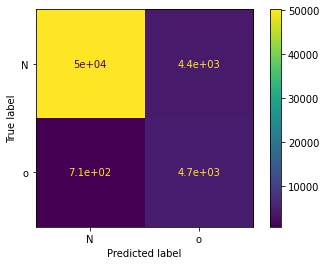

In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_Train_label_5, y_pred_cross_val)

cm_display = ConfusionMatrixDisplay(cm,display_labels='None').plot()

On obtient une matrice de confusion 2*2 avec les true positif et true negatif. Il y a beaucoup de true négatif (carré jaune) ce qui correspond au 90% de non_5. 




###2-3- Précision et rappel

24) Calcul de précision 


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print(precision_score(Y_Train_label_5,y_pred_cross_val,average='macro'))
print(recall_score(Y_Train_label_5,y_pred_cross_val,average='macro'))
print(f1_score(Y_Train_label_5,y_pred_cross_val,average='macro'))

0.921867591766862
0.8428952055028492
0.8773107134117566


Résultats : 


*   precision_score : 0.921867591766862
*   recall_score = 0.8428952055028492
*   f1_score = 0.8773107134117566

Avec ce model d'apprentissage : 92% d'identifications positives sont effectivement correctes. Sa prédiction est juste pour 92% des cas. En fait cela est due encore au 90% de non 5.Notre modèle a un rappel de 0,84. En d'autres termes, il identifie correctement 84% des données d'apprentissage. 

26) Calcul des prédictions basés sur la decision_function

In [ ]:
y_pred_decision_function = cross_val_predict(SGDClassifier2, X_train, Y_Train_label_5, cv=3, method='decision_function')#cv=3 : types 3-fols
print(y_pred_decision_function)

[  2379.14946162  -9344.88007156 -18928.04340686 ...  12322.80071089
   -191.66328471  -6364.99555272]



En comparant les scores de prédiction "cross_val_predict" et les scores de "cross_val_predict" on remarque des similitudes. Toutes les scores d'instances supérieurs à 0 retournent une prédiction True et les scores inférieurs à 0 retournent une prédiction False. 

26) Calcul des précision sur la prédiction de la decision_function

In [ ]:
from sklearn.metrics import precision_recall_curve


prec, recall, _ = precision_recall_curve(Y_Train_label_5, y_pred_decision_function)

print(prec)
print(recall)

[0.09042535 0.09041018 0.09041169 ... 0.5        1.         1.        ]
[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 1.84467810e-04
 1.84467810e-04 0.00000000e+00]


28) Courbe des precisions/rappels

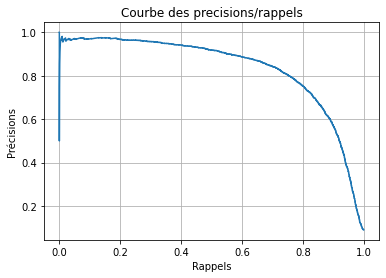

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
from matplotlib.pyplot import grid
import matplotlib.pyplot as plt
plt.plot(recall,prec)
plt.xlabel('Rappels')
plt.ylabel('Précisions')
plt.title('Courbe des precisions/rappels')
plt.grid(True)

 précision et rappel sont fréquemment en tension. Ceci est dû au fait que l'amélioration de la précision se fait généralement au détriment du rappel et réciproquement. 


* Lorsqu'on augmente le seuil de classification : 
Le nombre de faux positifs diminue, mais les faux négatifs augmentent. En conséquence, la précision augmente tandis que le rappel diminue. 


* Lorsqu'on diminue le seuil de classification : 
Les faux positifs sont plus nombreux, et le nombre de faux négatifs diminue. En conséquence, la précision diminue tandis que le rappel augmente :




##2-4- Courbe ROC


[0.         0.01002217 1.        ]
[0.         0.69581258 1.        ]


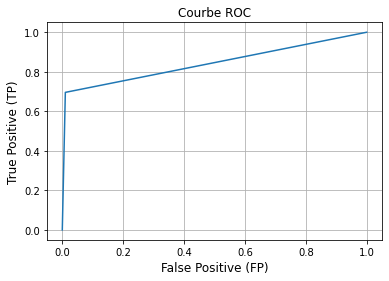

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_Train_label_5, y_pred_cross_val)
import matplotlib.pyplot as plt
print(fpr)
print(tpr)
plt.plot(fpr,tpr)
plt.title('Courbe ROC valeur prédites')
plt.xlabel('False Positive (FP)',fontsize=12)
plt.ylabel('True Positive (TP)',fontsize=12)
plt.grid(True)

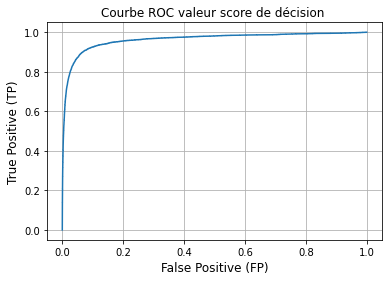

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_Train_label_5, y_pred_decision_function)
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.title('Courbe ROC valeur score de décision ')
plt.xlabel('False Positive (FP)',fontsize=12)
plt.ylabel('True Positive (TP)',fontsize=12)
plt.grid(True)

In [ ]:
from sklearn.metrics import roc_auc_score
print("Area Under the Curve = ",roc_auc_score(Y_Train_label_5, y_pred_cross_val,multi_class='ov0'))

Area Under the Curve =  0.8428952055028492


Un modèle dont 100 % des prédictions sont erronées a un AUC de 0,0. Si toutes ses prédictions sont correctes, son AUC est de 1,0.On peut interpréter l'AUC comme une mesure de la probabilité pour que le modèle classe un exemple positif aléatoire au-dessus d'un exemple négatif aléatoire

#**III-Apprentissage d'un classifieur multiclasses**

##1-Apprentissage des données 


35) Apprentissage du modèle sur instances de toutes les images


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

SGDClassifierMulti = SGDClassifier()

SGDClassifierMulti.fit(X_train,Y_train);

36) Via le modèle d'apprentissage bâti, prédisez la classe de la première instance de la base de données (celle de la question 9).

In [ ]:
predictSGDClassifier = SGDClassifierMulti.predict(mnist.data[0].reshape(1, -1)) #Prédiction des données 
print(predictSGDClassifier)

[5]


37) a) affichez, via la méthode "decision_function", les 10 scores de décision utilisés par la méthode SGD pour classifier la première instance de la base de données. 


In [ ]:
SGDClassifierMulti.decision_function(X_train)

array([[-21695.19159815, -19441.82459448, -10296.6336407 , ...,
        -10911.43860394,  -7733.49869233, -12188.73411884],
       [ 21759.54468652, -25818.20007349, -20468.10475569, ...,
        -18019.86233581,  -4508.38299266, -14148.65057219],
       [-34181.66966202, -16252.51866696,  -5726.69402802, ...,
         -5859.77017383,  -7956.36378004, -13777.73502707],
       ...,
       [-18105.7821708 ,  -7343.94104905, -21505.86835042, ...,
        -18911.0795058 ,  -1673.67871409, -15812.22042022],
       [-22417.60303846, -17549.22983415, -16080.79244821, ...,
        -13878.73164121,  -6928.72650769, -16207.4112719 ],
       [ -8889.06386618, -23388.75917421, -19642.249012  , ...,
        -11659.27291114,   1134.01029596,  -1785.06480179]])

37) b) Affichez, via l'attribut "classes_", les différentes classes utilisées par le classifieur.

In [ ]:
SGDClassifierMulti.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

on remarque que le classifieur utilise bien les bonne classe pour classifier les données. 

##2- Evaluation du modèle d'apprentissage sur les données   d'apprentissage


###2-1-Taux de classification
 


40) Répartit la base d'apprentissage en base d'apprentissage et en base de validation en utilisant la méthode 3-fold cross-validation.

3 RMSE SGDClassifierMulti [0.87555 0.8739  0.8698 ] 

Accuracy SGDClassifierMulti : 0.87 (+/- 0.00)

In [ ]:
from sklearn.model_selection import cross_val_score

#cv = 3 car 3-fold cross-validation.
scoresMultiClf= cross_val_score(SGDClassifierMulti,X_train,Y_train,scoring="accuracy",cv=3)


#valeurs des 10  RMSE 
print(" 3 RMSE SGDClassifierMulti",scoresMultiClf,"\n")

#écart type et moyenne 
print("Accuracy SGDClassifierMulti : %0.2f (+/- %0.2f)" % (scoresMultiClf.mean(), scoresMultiClf.std() * 2))

 3 RMSE SGDClassifierMulti [0.8689  0.8783  0.87575] 

Accuracy SGDClassifierMulti : 0.87 (+/- 0.01)


41)Scaling
a) Transformer une feature en une autre qui répondra à la loi normale 

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit_transform(X_train)
#cv = 3 car 3-fold cross-validation.
scoresMultiClf= cross_val_score(SGDClassifierMulti,X_train,Y_train,scoring="accuracy",cv=3)

#valeurs des 10  RMSE 
print(" 3 RMSE scaler",scoresMultiClf,"\n")

#écart type et moyenne 
print("Accuracy scaler : %0.2f (+/- %0.2f)" % (scoresMultiClf.mean(), scoresMultiClf.std() * 2))

 3 RMSE scaler [0.87125 0.86745 0.8565 ] 

Accuracy scaler : 0.87 (+/- 0.01)


Les résultats sont meilleurs que la question précédente. Car 

###2-2-Matrice de confusion 


43) En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d'apprentissage. Pour ce faire, utilisez la fonction "cross_val_predict"

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import  confusion_matrix

y_pred_cross_val = cross_val_predict(SGDClassifierMulti, X_train, Y_train, cv=3)
print(y_pred_cross_val)

[5 0 4 ... 5 6 8]


44) Affichez la matrice de confusion du modèle d'apprentissage

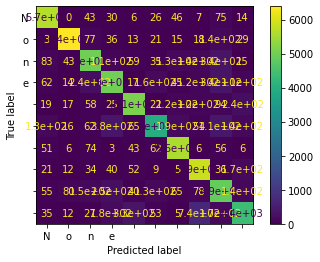

In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_MultiCLF= y_pred_cross_val

cm = confusion_matrix(Y_train, y_pred_MultiCLF)

cm_display = ConfusionMatrixDisplay(cm,display_labels='None').plot()

Plus il y a de couleur jaune plus il y a de bonnes prédictions. Il est normal d'obtenir une diagonal jaune (verte) puisque la correspondance classe rélle = classe prédite se trouve sur la diaginale. Les éléments de la diagonale de la matrice de confusion représentent le nombre de points pour lesquels la prédiction de l'étiquette est égale à la vraie étiquette On remaque que le model a une bonne prédiction puisque cette diagonale ressort bien. 

45) Normalisez la matrice de confusion pour avoir que des pourcentages. 

Lien du code : https://stackoverflow.com/questions/20927368/python-how-to-normalize-a-confusion-matrix



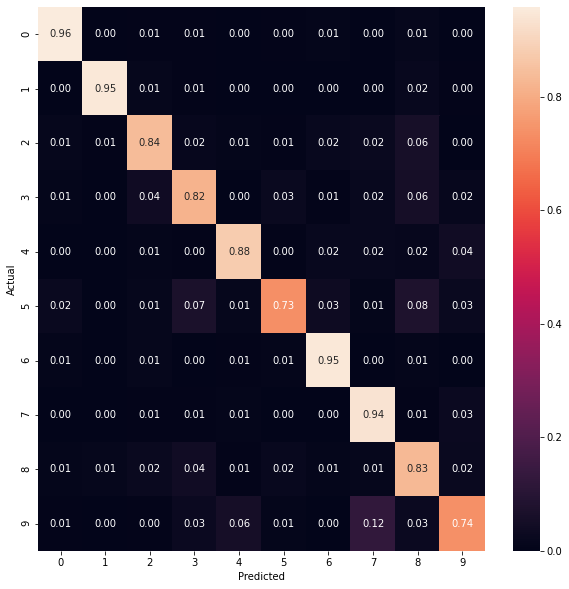

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]; 
fig, ax = plt.subplots(figsize=(10,10)); 
sns.heatmap(cmn, annot=True, fmt='.2f');
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.show(block=False);

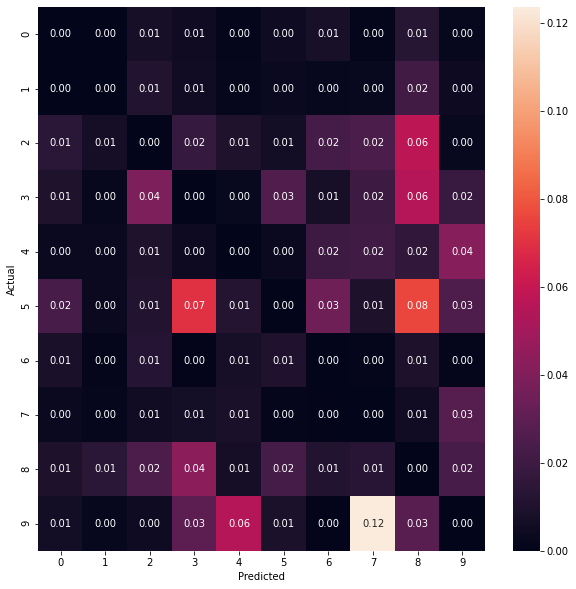

In [ ]:
np.fill_diagonal(cmn, 0)
fig, ax = plt.subplots(figsize=(10,10)); 
sns.heatmap(cmn, annot=True, fmt='.2f');
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.show(block=False);

Qu'est ce que vous remarquez à propos de la classe 8 ? 
Pourquoi, à votre avis, il existe une forte confusion entre les classes 3 et 5 ?

12% de la classe neuf est prédis en étant 7. C'est la plus grosse erreur de prédiction. Il y a confusion entre 9 et 7. 

De même pour 5 et 3. 7% des features 5 sont prédites en 3. 

La classe 8 représente le plus d'errerus de prédiction. C'est à dire que presque tous les vrai chiffres vont être au moins une fois prédis en tant que 8. 

#IV- Classification multi-label


49) A) Créez un code qui stocke dans une variable True si les labels de la base d'apprentissage sont supérieurs à 7 et False sinon


In [ ]:

Y_Train_sup7  = []
for i in range (len(Y_train)) :
    if Y_train[i] >= 7 :
        Y_Train_sup7.append(True)
    else:
        Y_Train_sup7.append(False)

#print(Y_Train_sup7)

[False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, True, True, True, False, True, True, False, True, False, False, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, True, False, False, False, True, False, False, True, False, True, True, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, True, False, False, True, False, True, False, True

49) B) Créez un code qui stocke dans une variable True si les labels de la base d'apprentissage sont impaires

In [ ]:

Y_Train_impaire  = []
for i in range (len(Y_train)) :
    if Y_train[i] % 2 == 0 :
        Y_Train_impaire.append(False)
    else:
        Y_Train_impaire.append(True)
#print(Y_Train_impaire)

[True, False, False, True, True, False, True, True, True, False, True, True, True, False, True, True, False, False, False, True, False, False, True, True, True, False, False, True, False, True, True, False, False, True, False, True, False, False, True, False, True, False, True, True, True, True, False, True, True, True, True, False, True, False, True, False, False, True, False, True, False, False, False, False, False, True, False, True, False, False, True, True, True, False, True, False, False, True, True, True, True, False, False, False, True, False, True, True, False, False, False, True, False, False, False, False, True, False, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, True, False, False, True, False, False, False, False, False, False, True, True, False, False, False, True, False, True, False, True, True, True, True, True, False, True, False, True, True, False, False, False, True, False, False, True, True, False, False, True, True, T

49) C) Concaténez les deux vecteurs via la fonction "c_" du module numpy


In [ ]:
multi_label= np.c_[Y_Train_impaire,Y_Train_sup7]

50) a) Créez un objet de la classe KNeighborsClassifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,multi_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
predict_neigh = neigh.predict(mnist.data[0].reshape(1, -1)) #Prédiction des données de la data 0 
print(predict_neigh)

[[ True False]]


On est sensé obtenir 5. 5 est impaire et inférieur à 7 donc la prédiction est correcte. 

#V- Classification multi-output

53) A) Créez un vecteur de bruit qui a la longueur de la base d'apprentissage 

In [ ]:
noise_train = np.random.randint(0, 100, (len(X_train), 784))


53) B) ajoutez ce bruit avec une simple addition à la base d'apprentissage


In [ ]:
X_train_noise= X_train + noise_train


54) A) Ajoutez du bruit aux images de test

In [ ]:

noise_test = np.random.randint(0, 100, (len(X_test), 784))


54) B) Ajoutez ce bruit avec une simple addition à la base de test


In [ ]:
X_test_noise = X_test+noise_test

55) Créez une variable qui va contenir les labels de la base d'apprentissage, à savoir les image d'apprentissage non bruitées

In [ ]:
Y_train_no_noise = Y_train

56) Créez une variable qui va contenir les labels de la base de test, à savoir les images de test non bruitées

In [ ]:
Y_test_no_noise = Y_test

57) Affichez une image bruitée ainsi que sa version non-bruitée. Pour ce faire, suivez les étapes de la question 8.a et utilisez la fonction "subplot" du sous-module "pyplot" du module "matplotlib"

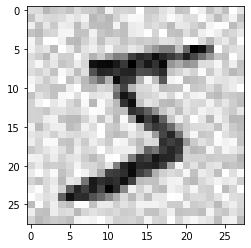

In [ ]:
#np.reshape(X[0],(28,28));
img0_noise=X_train_noise[0].reshape(28,28)#redimensionner la première instance des données
import matplotlib as mpl
import matplotlib.pyplot as plt 
plt.imshow(img0_noise,cmap=mpl.cm.binary)

58) A) Faites un apprentissage sur les images d'apprentissage bruitée

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh_noise = KNeighborsClassifier(n_neighbors=3)
neigh_noise.fit(X_train_noise,Y_train_no_noise)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Prédisez la classe (sous forme de vecteurs) de la première instance de la base de test.

In [ ]:
predict_neigh_noise= neigh_noise.predict(X_test_noise[0].reshape(1, -1)) #Prédiction des données de la data 0 
print(predict_neigh_noise)

[7]


Afficher les valeurs du vecteur 

In [ ]:
#print(X_test_noise[0])

[ 87.  11.  36.  73.  54.  23.  64.  45.  74.  38.  53.  49.  64.  71.
  88.  93.  52.  16.  33.  78.  80.   4.  13.  76.  13.  86.  46.  20.
  68.  63.  36.  53.  43.   4.  19.  82.   9.  90.  14.  84.  84.  25.
  33.  19.  20.  24.  10.  47.  35.  46.  23.  26.  25.  44.  15.  41.
  12.  22.   7.  45.  58.  75.  13.  62.   4.  86.  10.  16.  46.  74.
  98.  38.   8.  65.  88.  89.  31.  61.  41.  28.  93.  64.  53.  82.
   9.  69.  76.   9.  42.  27.  85.  70.  78.   6.  57.  12.  36.  12.
  85.  92.  80.  75.  32.  35.  74.  72.  41.  86.  96.  94.  24.  50.
  52.  12.  22.  31.  69.  97.  41.   0.   7.  25.  71.  71.  20.  79.
  24.  91.  69.   7.  22.  13.  49.  93.  97.   6.  66.  27.  37.  21.
  33.  54.  16.  23.  20.  52.  51.  91.  18.  49.  18.  46.  16.  78.
  96.  17.  18.  29.  99.  87.  38.   8.  90.  87.  96.  98.  95.  84.
  19.  37.  94.  89.  65.  10.  39.   3.  24.  22.  80.  16.  65.  34.
  30.   8.  81.  27.   0.  65.  22.   4.  77.  38.  50.   3.  19.  91.
  25. 

Afficher le vecteur sous forme d'image 

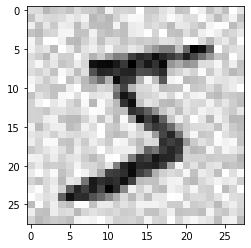

In [ ]:
img0_noise_test=X_test_noise[0].reshape(28,28)#redimensionner la première instance des données
import matplotlib as mpl
import matplotlib.pyplot as plt 
plt.imshow(img0_noise,cmap=mpl.cm.binary)